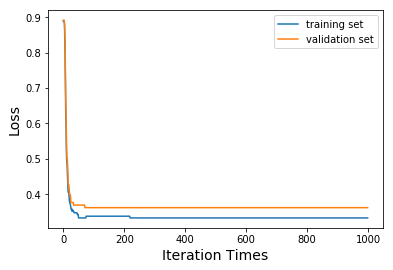

In [3]:
# %load linearclassification.py
#线性分类和梯度下降的实验
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split #引入必要的库 

def get_data():  #获取数据，以及对数据进行一些预处理 
    data=load_svmlight_file('australian_scale.txt')
    x=data[0]
    y=data[1] #获取原始数据
    x=x.toarray()
    m,n=np.shape(x)
    adder=np.ones(m)
    x=np.column_stack((x,adder)) #给x增加一列，便于后面的线性回归中的常数项的处理
    w=np.zeros(n+1) 
    b=0 #全零初始化
    x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.4,random_state=4) #分割数据集
    return x_train,y_train,x_validation,y_validation,w,b 

def get_loss(x,y,w,b): #获取loss函数值，这里是线性分类问题，我们使用Hinge Loss 来计算
    m,n=np.shape(x)
    loss=0
    C=1/m
    threshold=0.01 #阈值
    for i in range(0,m):
        hypothesis=np.dot(w.T,x[i]) #假设计算出来的结果
        if hypothesis>threshold: #大于为正例，反之为负例
            hypothesis=+1
        else:
            hypothesis=-1
        hinge=max(0,1-y[i]*hypothesis) #计算单个样本的hingeloss
        loss=C*hinge+loss #总的数据集的loss
    return loss

def gradientdesent(w,rate,x,y): #批量梯度下降法
    m,n=np.shape(x)
    gradient=w-w
    C=0.0
    C=1/m
    for i in range(0,m): #对所有的样本
        condition=1-y[i]*(np.dot(w.T,x[i])+b) #梯度情况的判定
        if condition>=0: 
            gradient=gradient+w.T-np.dot(y.T,x)*C 
        else:
            gradient=gradient+w.T
    gradient=(gradient/m) #取平均值
    w=w-rate*gradient
    return w

rate=0.002 #学习率
iterations=1000 #迭代次数
loss_trains=[] #保存Ltrain
loss_validations=[]#保存Lvalidation
iteration_times=[i for i in range(0,iterations)] #作为x轴的值
x_train,y_train,x_validation,y_validation,w,b=get_data() #获得数据
for i in range(0,iterations): #在迭代中
    w=gradientdesent(w,rate,x_train,y_train) #更新权重
    loss_train=get_loss(x_train,y_train,w,b) #获得loss
    loss_validation=get_loss(x_validation,y_validation,w,b)
    loss_trains.append(loss_train) #把loss加入列表
    loss_validations.append(loss_validation)

plt.xlabel("Iteration Times",size=14) #画图
plt.ylabel("Loss",size=14)
plt.plot(iteration_times,loss_trains,label="training set")
plt.plot(iteration_times,loss_validations,label="validation set")
plt.legend()
plt.show()
